# Random Forest Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\NandhaKishore\Desktop\Project\DATA_SETS\realistic_housing_dataset.csv")
df.head()

,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Distance_to_City_km,Parking,Price_Lakhs
0,3674,2,1,3,13,21.50,1,189.50
1,1360,1,2,3,13,10.73,1,97.62
2,1794,2,1,1,3,1.08,0,112.91
3,1630,1,1,2,29,7.79,1,47.63
4,1595,4,2,3,5,5.57,1,107.62


In [3]:
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")


📊 Dataset Shape: (1000, 8)
Features: ['Area_sqft', 'Bedrooms', 'Bathrooms', 'Floors', 'Age_of_House', 'Distance_to_City_km', 'Parking', 'Price_Lakhs']


In [4]:
print("\n📈 Dataset Info:")
print(df.info())


📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area_sqft            1000 non-null   int64  
 1   Bedrooms             1000 non-null   int64  
 2   Bathrooms            1000 non-null   int64  
 3   Floors               1000 non-null   int64  
 4   Age_of_House         1000 non-null   int64  
 5   Distance_to_City_km  1000 non-null   float64
 6   Parking              1000 non-null   int64  
 7   Price_Lakhs          1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
None


In [5]:
print("\n📋 First 5 rows:")
df.head()


📋 First 5 rows:


,Area_sqft,Bedrooms,Bathrooms,Floors,Age_of_House,Distance_to_City_km,Parking,Price_Lakhs
0,3674,2,1,3,13,21.50,1,189.50
1,1360,1,2,3,13,10.73,1,97.62
2,1794,2,1,1,3,1.08,0,112.91
3,1630,1,1,2,29,7.79,1,47.63
4,1595,4,2,3,5,5.57,1,107.62


In [6]:
print("\n📊 Statistical Summary:")
print(df.describe())


📊 Statistical Summary:
         Area_sqft     Bedrooms    Bathrooms       Floors  Age_of_House  \
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000   
mean   2303.765000     2.979000     2.467000     1.993000     14.696000   
std    1020.993533     1.414411     1.134989     0.828032      8.615556   
min     501.000000     1.000000     1.000000     1.000000      0.000000   
25%    1428.000000     2.000000     1.000000     1.000000      7.000000   
50%    2258.500000     3.000000     2.000000     2.000000     15.000000   
75%    3274.750000     4.000000     4.000000     3.000000     22.000000   
max    3999.000000     5.000000     4.000000     3.000000     29.000000   

       Distance_to_City_km      Parking  Price_Lakhs  
count          1000.000000  1000.000000  1000.000000  
mean             20.579100     1.017000   133.708230  
std              11.089504     0.818157    58.167232  
min               1.080000     0.000000    -9.950000  
25%              11.10750

In [7]:
df.isnull().sum()

Area_sqft              0
Bedrooms               0
Bathrooms              0
Floors                 0
Age_of_House           0
Distance_to_City_km    0
Parking                0
Price_Lakhs            0
dtype: int64

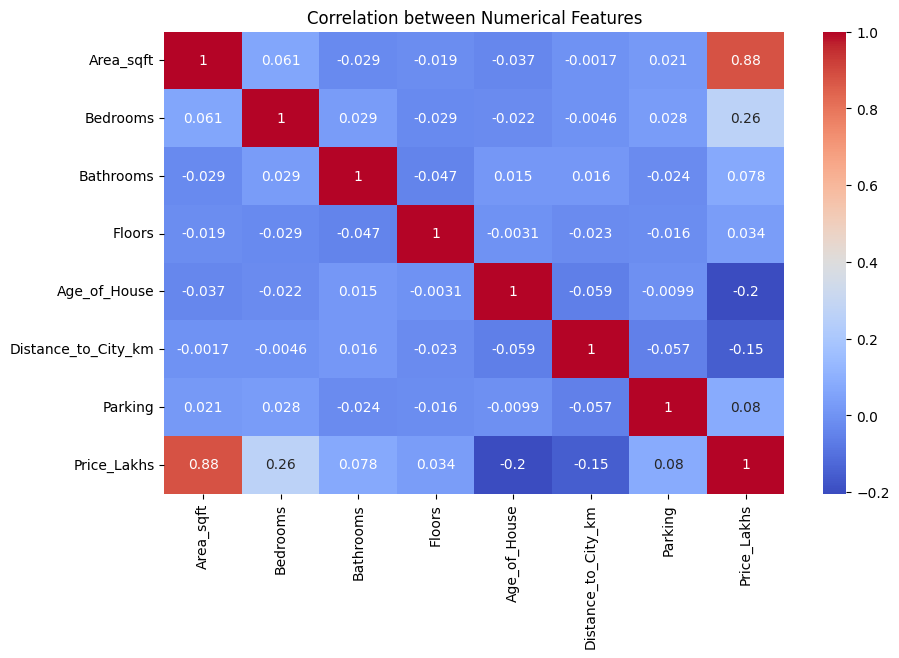

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between Numerical Features")
plt.show()

In [10]:
X = df.drop("Price_Lakhs", axis=1)
y = df["Price_Lakhs"]


In [11]:
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

In [12]:
print(categorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['Area_sqft', 'Bedrooms', 'Bathrooms', 'Floors', 'Age_of_House',
       'Distance_to_City_km', 'Parking'],
      dtype='object')


If column City = ['Delhi', 'Mumbai'], then after encoding:

id  city
1    delhi
2    Mumbai

id |City_Delhi | City_Mumbai
 1    1     |      0
 2    0     |      1

price = 10, 100, 601, 6000, 100000  --> 2.2, 4.3, -1.8, 1.9

In [13]:
# Create ColumnTransformer for encoding
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ("scale", StandardScaler(), numerical_features)
])


In [14]:
# Build the pipeline with RandomForestRegressor
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [16]:
# Train the model
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehot', ...), ('scale', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers

In [17]:
# Predict on test data
y_pred = pipeline.predict(X_test)


In [18]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.2f}")

📊 Model Evaluation:
Mean Absolute Error (MAE): ₹18.01
Root Mean Squared Error (RMSE): ₹22.90
R² Score: 0.85


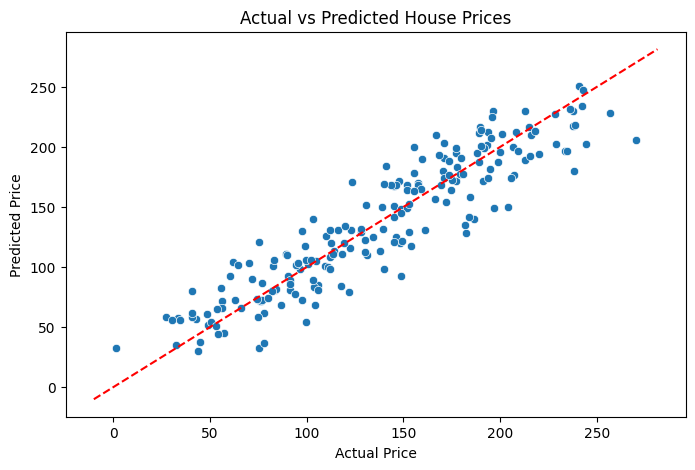

In [19]:
# Actual vs Predicted plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()

In [ ]:
import joblib
joblib.dump(rf_model, "housing_random_forest_model.pkl")

print("Model saved successfully!")